In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision

from sklearn.datasets import load_boston
from torch import nn 
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
# random matrix
a = np.random.rand(5, 3)
a

array([[0.71279821, 0.8221913 , 0.89366234],
       [0.88702051, 0.94439262, 0.20843262],
       [0.72448048, 0.39826559, 0.87620005],
       [0.96615356, 0.70131835, 0.77003771],
       [0.33997977, 0.59034438, 0.6698747 ]])

In [3]:
print(f"Размеры: {a.shape}")

Размеры: (5, 3)


In [4]:
print(f"Добавили 5:\n{a + 5}")

Добавили 5:
[[5.71279821 5.8221913  5.89366234]
 [5.88702051 5.94439262 5.20843262]
 [5.72448048 5.39826559 5.87620005]
 [5.96615356 5.70131835 5.77003771]
 [5.33997977 5.59034438 5.6698747 ]]


In [5]:
print(f"Посчитали произведение Х Х^T:\n{a @ a.T}")

Посчитали произведение Х Х^T:
[[1.9827122  1.59500641 1.62688588 1.95344408 1.32635477]
 [1.59500641 1.72212695 1.2013768  1.67981887 0.99870964]
 [1.62688588 1.2013768  1.45121398 1.65397744 1.0683668 ]
 [1.95344408 1.67981887 1.65397744 2.0182582  1.25832079]
 [1.32635477 0.99870964 1.0683668  1.25832079 0.91282484]]


In [6]:
print(f"Среднее по колонкам:\n{a.mean(axis=-1)}")

Среднее по колонкам:
[0.80955062 0.67994858 0.66631537 0.81250321 0.53339962]


In [7]:
print(f"Изменили размеры: {a.reshape(3, 5).shape}")

Изменили размеры: (3, 5)


**Задание**

При помощи Numpy посчитайте сумму квадратов натуральных чисел от 1 до 1000.

In [8]:
x = np.arange(1, 10_001) #от 1 до 10000 чтобы включительно 10011 + заметим что добавили _ чтобы глазам было легче воспринимать число, на само число не влияет 
np.sum(x * x) 

333383335000

Аналогичные операции в PyTorch выглядят следующим образом, синтаксис отличается, но не сильно:

In [9]:
x = torch.rand(5, 3)
x

tensor([[0.3708, 0.1277, 0.5063],
        [0.6971, 0.4951, 0.8587],
        [0.4790, 0.7931, 0.0970],
        [0.9950, 0.7776, 0.7498],
        [0.0972, 0.5964, 0.3516]])

In [10]:
print(f"Размеры: {x.shape}")

Размеры: torch.Size([5, 3])


In [11]:
print(f"Добавили 5:\n{x +5}")

Добавили 5:
tensor([[5.3708, 5.1277, 5.5063],
        [5.6971, 5.4951, 5.8587],
        [5.4790, 5.7931, 5.0970],
        [5.9950, 5.7776, 5.7498],
        [5.0972, 5.5964, 5.3516]])


In [12]:
#для перемножения тензоров высокой размерности читайте документацию по различным вариантам:
#torch.mm, torch.matmul, torch.bmm, @
print(f"X X^T (1):\n{torch.matmul(x, x.transpose(1, 0))}\n")
print(f"X X^T (2):\n{x.mm(x.t())}")

X X^T (1):
tensor([[0.4101, 0.7565, 0.3280, 0.8478, 0.2902],
        [0.7565, 1.4685, 0.8099, 1.7224, 0.6650],
        [0.3280, 0.8099, 0.8679, 1.1660, 0.5537],
        [0.8478, 1.7224, 1.1660, 2.1568, 0.8241],
        [0.2902, 0.6650, 0.5537, 0.8241, 0.4887]])

X X^T (2):
tensor([[0.4101, 0.7565, 0.3280, 0.8478, 0.2902],
        [0.7565, 1.4685, 0.8099, 1.7224, 0.6650],
        [0.3280, 0.8099, 0.8679, 1.1660, 0.5537],
        [0.8478, 1.7224, 1.1660, 2.1568, 0.8241],
        [0.2902, 0.6650, 0.5537, 0.8241, 0.4887]])


In [13]:
print(f"Среднее по колонкам:\n{x.mean(dim=-1)}")

Среднее по колонкам:
tensor([0.3349, 0.6836, 0.4564, 0.8408, 0.3484])


In [14]:
print(f"Изменили размеры:\n{x.view([3, 5]).shape}\n") #размерности [3,5] должны соответсвовать кол-ву элементов в этом случае максимум [15,1]

#будьте внимательны и не используйте view для транспонирования осей
print(f"По-другому изменили размеры:\n{x.view_as(x.t()).shape}\n")
print(f"Но не транспонировали!\n{x.view_as(x.t()) == x.t()}")

Изменили размеры:
torch.Size([3, 5])

По-другому изменили размеры:
torch.Size([3, 5])

Но не транспонировали!
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])


**Пример, того как меняются операции в Pytorch отличие от Numpy**

- x.reshape([1,2,8]) --> x.view(1,2,8)
- x.sum(axis=-1)  -->  x.sum(dim=-1)
- x.astype("int64") -->  x.type(torch.LongTensor)

для помощи в изучении есть таблица, которая помогает найти аналог операции в numpy

**Задача на pytorch**

Посчитайте сумму квадратов натуральных чисел от 1 до 10 000

In [15]:
# решение
a = torch.arange(1, 10_001)

torch.sum(a * a).item()

333383335000

**Создаем тензоры в Pytorch и снова изучаем базовые операции**


In [16]:
x = torch.empty(5, 3) #пустой тензор
print(x)

tensor([[0.0000e+00, 1.4013e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.1704e-41, 0.0000e+00, 2.2369e+08],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [17]:
x = torch.rand(5, 3) #случайный тензор
print(x)

tensor([[0.5603, 0.7184, 0.3347],
        [0.4175, 0.5075, 0.0997],
        [0.8651, 0.9067, 0.7250],
        [0.1501, 0.5917, 0.3840],
        [0.8131, 0.1799, 0.1061]])


In [18]:
x = torch.zeros(5, 3, dtype=torch.float32) #тензор с нулями и указанием типов чисел
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [19]:
x = torch.tensor([5.5, 3])  # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [20]:
x = torch.tensor(np.array([5.5, 3]))  #можно торч тензор из нампая - передать нампай арей 
print(x)

tensor([5.5000, 3.0000], dtype=torch.float64)


In [21]:
x1 = x.new_ones(5, 3, dtype=torch.double)  # используем уже созданный тензор для создания тензора из единичек
print(x1, x1.size)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) <built-in method size of Tensor object at 0x1086fbea0>


In [22]:
x = torch.randn_like(x1, dtype=torch.float)  # создаем случайный тензор с размерами х
print(x, x.size())

tensor([[-0.1679,  0.1805,  0.5862],
        [ 0.7296,  0.3347,  0.1400],
        [ 0.7409, -1.0386,  0.5043],
        [ 1.0535, -0.1610, -0.0789],
        [ 0.4514, -1.0024, -2.0118]]) torch.Size([5, 3])


In [23]:
y = torch.rand(5, 3)
print(x +y)  #операция сложения по элементно

tensor([[ 0.3629,  1.1336,  0.6924],
        [ 1.2505,  1.2357,  0.2368],
        [ 0.8133, -0.7886,  0.9618],
        [ 1.4155,  0.5531,  0.1125],
        [ 0.9473, -0.3616, -1.0328]])


In [24]:
z = torch.add(x, y)  #очередная операция сложения
print(z)

tensor([[ 0.3629,  1.1336,  0.6924],
        [ 1.2505,  1.2357,  0.2368],
        [ 0.8133, -0.7886,  0.9618],
        [ 1.4155,  0.5531,  0.1125],
        [ 0.9473, -0.3616, -1.0328]])


In [25]:
torch.add(x, y, out=z)  #и наконец последний вид эквивалент записи z = torch.add(x, y)
print(z)

tensor([[ 0.3629,  1.1336,  0.6924],
        [ 1.2505,  1.2357,  0.2368],
        [ 0.8133, -0.7886,  0.9618],
        [ 1.4155,  0.5531,  0.1125],
        [ 0.9473, -0.3616, -1.0328]])


In [26]:
print(x * y)  #поэлементное умножение

tensor([[-0.0891,  0.1720,  0.0622],
        [ 0.3801,  0.3016,  0.0135],
        [ 0.0536, -0.2597,  0.2307],
        [ 0.3813, -0.1150, -0.0151],
        [ 0.2239, -0.6423, -1.9696]])


In [27]:
print(x @ y.t())    #матричное умножение

tensor([[ 1.4513e-01,  1.3185e-01,  3.0118e-01,  1.8028e-01,  6.0631e-01],
        [ 7.2121e-01,  6.9521e-01,  2.0053e-01,  5.2994e-01,  7.1342e-01],
        [-5.4317e-01, -5.0106e-01,  2.4615e-02, -3.7699e-01,  1.9561e-01],
        [ 3.9736e-01,  3.9609e-01, -1.3488e-04,  2.5128e-01,  3.4208e-01],
        [-9.2940e-01, -8.6261e-01, -1.1384e+00, -9.3739e-01, -2.3880e+00]])


In [28]:
print(x.mm(y.t()))  # опять матричное умножение

tensor([[ 1.4513e-01,  1.3185e-01,  3.0118e-01,  1.8028e-01,  6.0631e-01],
        [ 7.2121e-01,  6.9521e-01,  2.0053e-01,  5.2994e-01,  7.1342e-01],
        [-5.4317e-01, -5.0106e-01,  2.4615e-02, -3.7699e-01,  1.9561e-01],
        [ 3.9736e-01,  3.9609e-01, -1.3488e-04,  2.5128e-01,  3.4208e-01],
        [-9.2940e-01, -8.6261e-01, -1.1384e+00, -9.3739e-01, -2.3880e+00]])


In [29]:
print(x.unsqueeze(0).shape)    #добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [30]:
print(x.unsqueeze(0).unsqueeze(1).squeeze().shape)  #убрали измерение в начале

torch.Size([5, 3])


Также можно делать обычные срезы и переводить матрицы назад в Numpy:

In [31]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


**Работаем с градиентами руками**

/Users/anastasiadruzyanova/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

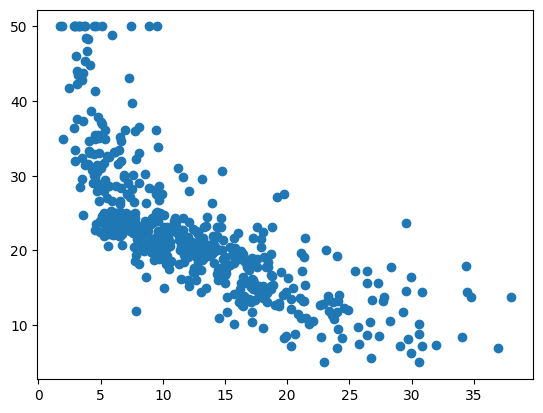

In [32]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

Pytorch дает возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра **requires_grad**. Когда **requires_grad=True** мы сообщаем фреймворку, что мы хотим следить за всеми тензорами, которые полуаются из созданного, т.е., у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр  **.grad**, в котором хранится значение градиента.   

Если к результирующему тензору применить метод **.backward()**, то фреймворк посчитатет по цепочке градиенту для всех тензоров, у которых **requires_grad=True**.

наша линейная регрессия будет такой: w * x + b

In [33]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [34]:
# посмотрим размерности
w.shape, b.shape, x.shape, y.shape

(torch.Size([1]), torch.Size([1]), torch.Size([506]), torch.Size([506]))

In [35]:
y_pred = w * x + b                      # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y) ** 2)    # совершаем операции с тензорами
loss.backward()                         # считаем градиенты

In [36]:
# сделали операции и посчитали градиенты, значение должно было появиться
assert w.grad is not None
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)


dL/dw = 
 tensor([-12.0430])
dL/db = 
 tensor([-43.7873])


**Ремарка:** для доступа к значениям в тензоре используйте атрибут **.data**:

In [37]:
w.data

tensor([0.0256])

In [38]:
w = torch.tensor(np.array([1.0]), requires_grad=True)
w

tensor([1.], dtype=torch.float64, requires_grad=True)

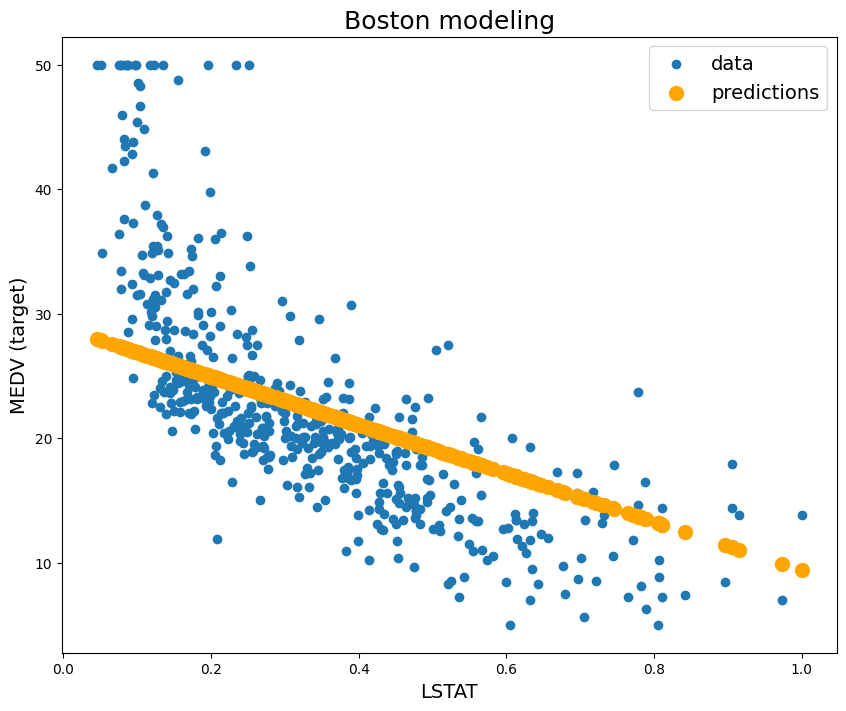

loss =  48.26847820319479


In [39]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # делаем полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad # code
    b.data -= 0.05 * b.grad # code

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color="orange", linewidth=5, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modeling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break


4 **Пишем нейросеть**

Чтобы разобраться как обучать нейросети в Pytorch нужно понять три вещи:
1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

**Как формировать батчи подавать их на вход нейросети**

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, аугментации, о которых будет позже инфа, нужно создать свой класс унаследованный от **torch.utils.data.Dataset**.

Пример из документации:
    
    class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

        def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)
        
        return sample

Как видно из примера выше, у каждого класса **должно быть два метода**:

- **__len__** -- возвращает инфу о том, сколько объектов у нас в датасете
- **__getitem** -- возвращает семпл и таргет к нему

Теперь напишем код самостоятельно и в качестве датасета сгенерируем рандомные данные

In [40]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [41]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [42]:
our_dataset = RandomDataset(x, y)

In [43]:
our_dataset.__getitem__(1)

{'sample': tensor([0.0135, 0.3212, 0.2655, 0.9061, 0.7476]),
 'target': 0.8168886553462912}

Для того чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от **torch.utils.data.Dataset**. Пример:

In [44]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [45]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.9019, 0.4600, 0.9948, 0.6404, 0.6885],
        [0.0135, 0.3212, 0.2655, 0.9061, 0.7476],
        [0.5400, 0.6861, 0.2651, 0.5651, 0.2330],
        [0.0818, 0.2524, 0.1538, 0.3960, 0.6720]])
Target:
tensor([0.0354, 0.8169, 0.4421, 0.0416], dtype=torch.float64)


**Как сделать нейросеть**

Для того чтобы в high-level pytorch создавать нейросети используется модуль ``nn``. Нейросеть должна быть унаследована от класса ``nn.Module``. Пример:

```
class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2(20, 20, 5)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))
```

Как мы видим на примере, у данного класса должен быть метод ``forward``, который определяет прямой проход нейросети. Также из класса выше видно, что модуль ``nn`` содержит в себереализацию большинства слоев, а модуль ``nn.functional`` -- функций активаций.

Есть еще один способ создать нейросеть, пример:

In [46]:
model = nn.Sequential()                     # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 10))    # добавили слой с 5-ю нейронами на вход и 10 на выход
model.add_module("l2", nn.ReLU())           # добавили функцию активации
model.add_module("l3", nn.Linear(10, 1))    # добавили слой с 10-мя нейронами на вход и 1-й на выход


# another way
another_model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [47]:
y_pred = model(batch['sample'])     #получили предсказание модели

In [48]:
y_pred

tensor([[-0.2762],
        [-0.1218],
        [-0.2247],
        [-0.1491]], grad_fn=<AddmmBackward0>)

In [49]:
y_pred.shape

torch.Size([4, 1])

в строке выше [4, 1] у нас 4 batch и 1 выход = предсказание, которое введено выше nn.Linear (10, 1), где один это выход = кол-во предсказаний, для задачи (предсказать стоимость дома = один выход = цена дома) это адекватно, но если у нас задача классификации с несколькими выходами, число соответственно меняем на большее (необходимое)

**Как написать цикл обучения и отслеживать метрики**

Соберем загрузку данных, создание модели и обучим на уже созданном датасете.

In [50]:
# используем готовый класс от торча для загрузки данных для тренировки

mnist_train = torchvision.datasets.MNIST(
    "./mnist/",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер

train_dataloader = torch.utils.data.DataLoader(
    mnist_train,
    batch_size=4,
    shuffle=True,
    num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val,
    batch_size=4,
    shuffle=True,
    num_workers=1
)

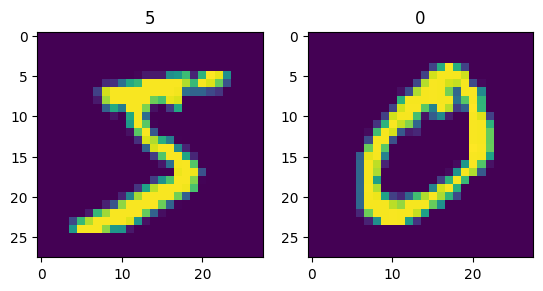

In [51]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [52]:
model = nn.Sequential(
    nn.Flatten(),               # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),    # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                  # нелинейность (релу)
    nn.Linear(128, 10),         # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет добавлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц следующим образом:

In [53]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[ 9.8906e-05, -3.4005e-02, -7.4666e-03,  ..., -1.4837e-02,
           -9.6901e-03,  2.8949e-02],
          [ 2.9418e-02, -3.2281e-02, -1.9096e-02,  ...,  3.6868e-03,
           -1.3182e-02, -1.8033e-02],
          [-3.5607e-02, -2.3028e-02,  6.5623e-03,  ..., -1.0307e-02,
           -2.4874e-02, -1.1138e-03],
          ...,
          [-1.7067e-02, -2.8612e-02,  3.0471e-02,  ..., -3.2429e-02,
           -1.9042e-02,  2.0329e-02],
          [-2.7441e-02, -8.9075e-03,  2.6863e-02,  ...,  3.4003e-02,
           -2.9870e-03,  2.6333e-02],
          [ 3.3138e-02, -8.6230e-03, -2.9797e-03,  ...,  1.2057e-02,
            1.8887e-02, -8.1664e-03]], requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([ 5.7434e-04,  6.7354e-03,  6.0527e-03,  6.7182e-03, -1.2929e-03,
          -1.4605e-02,  2.0807e-02,  1.8996e-02,  3.0709e-02, -2.2066e-02,
          -3.6807e-03,  3.4258e-02,  1.5277e-02, -3.3342e-02, -8.2950e-03,
          -2.4448e-02

Трекать метрики в полуавтоматическом режиме на wandb. 

In [54]:
import wandb
wandb.login()
wandb.init(project="pytorch-demo")
wandb.watch(model);

wandb: Currently logged in as: markbeth. Use `wandb login --relogin` to force relogin


In [55]:
# всего будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)

for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):         # taking batch from train loader
        y_pred = model(x_train)                             # making predictions
        loss = F.cross_entropy(y_pred, y_train)             # loss counting
        loss.backward()                                     # gradient counting with backward smth method
        optimizer.step()                                    # network parameter uploading
        optimizer.zero_grad()                               # reset to zero counted gradient parameters
    
    if epoch % 2 == 0:
        val_loss = []                                       # here we gonna put mean batch - loss
        val_accuracy = []
        with torch.no_grad():                               # don't let framework to count gradients using parameters on validation
            for x_val, y_val in tqdm(val_dataloader):       # take batch from val loader
                y_pred = model(x_val)                       # make predictions
                loss = F.cross_entropy(y_pred, y_val)       # count losses
                val_loss.append(loss.numpy())               # add an array
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())

        #
        wandb.log({"mean val loss": np.mean(val_loss),
                   "mean val accuracy": np.mean(val_accuracy)})
        
        #
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.12077559530735016, accuracy: 0.9641


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.10078701376914978, accuracy: 0.9694


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.09296617656946182, accuracy: 0.9712
